In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 상위 폴더(utils/)를 import 경로에 추가
sys.path.append(os.path.abspath('../utils'))
from data_preprocessing import Data_overview

In [3]:
# read train data and test data
dtypes = {'PassengerId':'object',
          'Survived':'int',
          'Pclass':'int',
          'Name':'object',
          'Sex':'object',
          'Age':'float',
          'SibSp':'float',
          'Parch':'float',
          'Ticket':'object',
          'Fare':'float',
          'Cabin':'object',
          'Embarked':'object'
          }
train_data = pd.read_csv('titanic_csv/train.csv',dtype=dtypes)
# we don't Column Passengerid for analyise this data set
train_data  = train_data.loc[:,'Survived':'Embarked']

In [4]:
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
title_map = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Mlle": "Miss",
    "Ms": "Miss",
    "Mme": "Mrs",
    "Dr": "Professional",
    "Rev": "Clergy",
    "Major": "Military",
    "Col": "Military",
    "Capt": "Military",
    "Don": "Nobility",
    "Sir": "Nobility",
    "Lady": "Nobility",
    "Countess": "Nobility",
    "Jonkheer": "Nobility"
}

train_data['Title_fixed'] = train_data['Title'].map(title_map).fillna('Others')

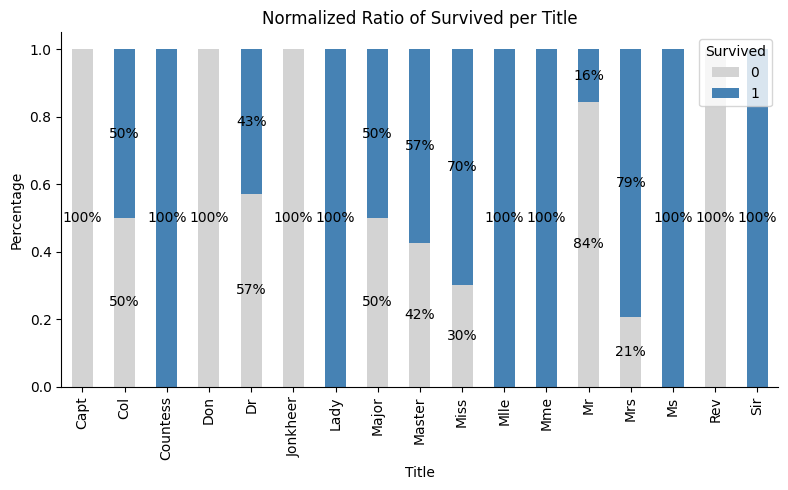

In [6]:
Data_overview.plot_binary_ratio_by_category(train_data, 'Title', 'Survived')

In [ ]:
test_data = pd.read_csv('titanic_csv/test.csv')

In [ ]:
Data_overview.evaluate_null_columns_prediction_model(train_data, column='Age', features=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Cabin','Title','Ticket'])